In [ ]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 201 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=955665dd87942d1b39485d57ac55b2a2cc6aa93b0ad6a95929944838b480e41c
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# raw data 바꿔가면서 분석
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/데이터.csv', index_col = 0, encoding = 'cp949')
raw_data = raw_data.drop("REFYM", axis = 1)

# 분석에 이용할 컬럼 바꾸고 싶으면 meaning list 수정
meaning_list_app = raw_data.columns.tolist()[48:]
meaning_list = ['승차인원','하차인원','단독주택','미등록','공동주택','제1종근린생활시설','제2종근린생활시설','업무시설','의료시설','노유자시설','종교시설','교육연구시설','자동차관련시설','창고시설','문화및집회시설','공장','위험물저장및처리시설','동.식물관련시설','판매시설','숙박시설','운동시설','분뇨.쓰레기처리시설','자원순환관련시설','근린생활시설','방송통신시설','교육연구및복지시설','운수시설','판매및영업시설','위락시설','교정및군사시설','수련시설',
 '장례시설','발전시설','공공용시설','관광휴게시설','야영장시설','묘지관련시설','다세대주택']
data= raw_data.loc[:, meaning_list]
data = data.dropna(axis=0)

#클러스터링 포함
cl_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/클러스터데이터0.csv', index_col = 0, encoding = 'cp949')
data = data.loc[cl_data.index.tolist(), :]
data['유동인구'] = data['승차인원'] + data['하차인원']
data = data.drop(['승차인원','하차인원'], axis = 1)
data

단독주택    미등록   공동주택  제1종근린생활시설  제2종근린생활시설   업무시설  의료시설  노유자시설  \
가락시장역           32.0    6.0  201.0       65.0       63.0   25.0   0.0    0.0   
강남역             73.0   98.0  103.0       93.0      247.0  216.0   0.0    3.0   
강동역           1037.0  144.0  545.0      130.0      116.0  114.0   4.0    6.0   
경복궁(정부서울청사)역   783.0  287.0   97.0      177.0      419.0   56.0   1.0    3.0   
고속터미널역          11.0   44.0  105.0       34.0       49.0   21.0  36.0    3.0   
...              ...    ...    ...        ...        ...    ...   ...    ...   
한대앞역           282.0  100.0  111.0       37.0       84.0    9.0   2.0   23.0   
한성백제역           47.0   17.0  261.0       30.0       34.0   44.0   0.0    1.0   
합정역            560.0  151.0  426.0      201.0      522.0   89.0  10.0    5.0   
홍대입구역          804.0  179.0  296.0      322.0      885.0  215.0   1.0    2.0   
회현(남대문시장)역     386.0  629.0   47.0      421.0      428.0   49.0   7.0    8.0   

              종교시설  교육연구시설  ...  교정및군사시설  수련시설  장례시설  발전시설  공공용시설  관광휴게시설  \
가락시장역          3.0     8.0  ...      0.0   0.0   0.0   0.0    0.0     0.0   
강남역            1.0    91.0  ...      0.0   0.0   0.0   0.0    0.0     0.0   
강동역           10.0     8.0  ...      0.0   0.0   0.0   0.0    0.0     0.0   
경복궁(정부서울청사)역   7.0    14.0  ...      0.0   0.0   0.0   0.0    0.0     0.0   
고속터미널역         5.0   116.0  ...      0.0   0.0  12.0   0.0    0.0     0.0   
...            ...     ...  ...      ...   ...   ...   ...    ...     ...   
한대앞역           1.0    17.0  ...      0.0   0.0   0.0   0.0    0.0     0.0   
한성백제역          3.0    17.0  ...      0.0   1.0   0.0   0.0    0.0     0.0   
합정역           16.0    15.0  ...      0.0   0.0   0.0   0.0    0.0     0.0   
홍대입구역          8.0    98.0  ...      0.0   1.0   0.0   0.0    0.0     0.0   
회현(남대문시장)역     3.0    48.0  ...      0.0   0.0   0.0   0.0    0.0     0.0   

              야영장시설  묘지관련시설  다세대주택       유동인구  
가락시장역           0.0     0.0    0.0  1787972.0  
강남역             0.0     0.0    0.0  8728872.0  
강동역             0.0     0.0    0.0  1934150.0  
경복궁(정부서울청사)역    0.0     0.0    0.0  2086308.0  
고속터미널역          0.0     0.0    0.0  7981652.0  
...             ...     ...    ...        ...  
한대앞역            0.0     0.0    0.0  1006674.0  
한성백제역           0.0     0.0    0.0   261936.0  
합정역             0.0     0.0    0.0  4976976.0  
홍대입구역           0.0     0.0    0.0  7846362.0  
회현(남대문시장)역      0.0     0.0    0.0  2786930.0  

[91 rows x 37 columns]

전처리

In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [ ]:
# 주변 건물의 수는 배제 (이상치 너무 많음) 후 이상치 탐지
for col in data.columns.tolist()[0:6]:
    outlier_idx = get_outlier(df=data, column=col, weight=1.5)
    data.drop(outlier_idx, axis=0, inplace=True)

In [ ]:
train_dataset, test_dataset = train_test_split(data, train_size=0.7, test_size=0.3,random_state=311)

In [ ]:
train_y = train_dataset[['유동인구']]
test_y = test_dataset[['유동인구']]
train = train_dataset.drop(['유동인구'], axis=1)
test = test_dataset.drop(['유동인구'], axis=1)

주성분 회귀분석

In [ ]:
from sklearn.preprocessing import StandardScaler
scale_train = pd.DataFrame(StandardScaler().fit_transform(train), columns=train.columns, index = train.index)
scale_train.mean(axis=0)

단독주택          8.163405e-19
미등록           4.571507e-17
공동주택          1.001378e-16
제1종근린생활시설     5.170156e-18
제2종근린생활시설     2.612289e-17
업무시설         -3.918434e-17
의료시설          2.585078e-17
노유자시설         6.530724e-17
종교시설         -2.394599e-17
교육연구시설       -2.176908e-18
자동차관련시설       3.591898e-17
창고시설          4.353816e-18
문화및집회시설       2.353782e-17
공장           -4.136125e-17
위험물저장및처리시설    3.755166e-17
동.식물관련시설      1.197299e-17
판매시설          2.829980e-17
숙박시설          2.775558e-17
운동시설          0.000000e+00
분뇨.쓰레기처리시설    2.721135e-17
자원순환관련시설      2.938826e-17
근린생활시설       -1.142877e-17
방송통신시설        7.836868e-17
교육연구및복지시설    -2.938826e-17
운수시설         -3.265362e-18
판매및영업시설      -1.523836e-17
위락시설          4.830014e-17
교정및군사시설       0.000000e+00
수련시설          1.523836e-17
장례시설          3.591898e-17
발전시설          0.000000e+00
공공용시설         0.000000e+00
관광휴게시설        9.796086e-18
야영장시설         0.000000e+00
묘지관련시설        0.000000e+00
다세대주택         0.000000e+00
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
scale_test = pd.DataFrame(StandardScaler().fit_transform(test), columns=test.columns, index = test.index)
scale_test.mean(axis=0)

단독주택         -1.513940e-17
미등록           5.046468e-17
공동주택         -1.009294e-17
제1종근린생활시설    -3.280204e-17
제2종근린생활시설    -1.160688e-16
업무시설         -6.055762e-17
의료시설          0.000000e+00
노유자시설         1.513940e-17
종교시설          5.046468e-18
교육연구시설       -2.523234e-17
자동차관련시설      -1.009294e-17
창고시설          4.037175e-17
문화및집회시설      -6.055762e-17
공장            2.775558e-17
위험물저장및처리시설    2.523234e-17
동.식물관련시설      6.055762e-17
판매시설          0.000000e+00
숙박시설         -2.523234e-18
운동시설         -6.055762e-17
분뇨.쓰레기처리시설    4.289498e-17
자원순환관련시설      0.000000e+00
근린생활시설        4.541821e-17
방송통신시설        0.000000e+00
교육연구및복지시설     0.000000e+00
운수시설          2.523234e-17
판매및영업시설       5.046468e-18
위락시설          0.000000e+00
교정및군사시설      -2.775558e-17
수련시설          0.000000e+00
장례시설          0.000000e+00
발전시설          0.000000e+00
공공용시설         0.000000e+00
관광휴게시설       -2.775558e-17
야영장시설         0.000000e+00
묘지관련시설        0.000000e+00
다세대주택         0.000000e+00
dtype: float64

In [ ]:
scale_train.cov()

단독주택       미등록      공동주택  제1종근린생활시설  제2종근린생활시설      업무시설  \
단독주택        1.020000  0.697837  0.313016   0.556429   0.551128  0.075691   
미등록         0.697837  1.020000 -0.007254   0.701323   0.621064 -0.046684   
공동주택        0.313016 -0.007254  1.020000   0.064395   0.235087  0.180945   
제1종근린생활시설   0.556429  0.701323  0.064395   1.020000   0.728877  0.299839   
제2종근린생활시설   0.551128  0.621064  0.235087   0.728877   1.020000  0.479644   
업무시설        0.075691 -0.046684  0.180945   0.299839   0.479644  1.020000   
의료시설        0.065605  0.031687  0.235803   0.129468   0.154279  0.182646   
노유자시설       0.576926  0.536151  0.205381   0.575515   0.480858  0.065195   
종교시설        0.382831  0.408069  0.083013   0.282127   0.475767  0.167416   
교육연구시설      0.284813  0.426495 -0.129239   0.221885   0.244244 -0.157993   
자동차관련시설     0.089204  0.042184  0.095722  -0.055938  -0.098343  0.110675   
창고시설        0.410876  0.691134 -0.001903   0.477242   0.333491 -0.161404   
문화및집회시설     0.187348  0.304542 -0.023340   0.308065   0.464301  0.147985   
공장          0.156794  0.348891 -0.199642   0.478545   0.308215  0.145676   
위험물저장및처리시설 -0.068134 -0.049079  0.055116  -0.116219  -0.104808 -0.103166   
동.식물관련시설   -0.163336 -0.074562 -0.086369  -0.175198  -0.207000 -0.129644   
판매시설        0.002305  0.346103 -0.181925   0.168731   0.109231 -0.104160   
숙박시설        0.246759  0.347311  0.144374   0.355292   0.326617  0.225443   
운동시설       -0.139222 -0.085181  0.171602   0.024194   0.145946  0.233467   
분뇨.쓰레기처리시설 -0.102455 -0.039947 -0.129795  -0.115288  -0.124902 -0.198153   
자원순환관련시설   -0.102455 -0.039947 -0.129795  -0.115288  -0.124902 -0.198153   
근린생활시설      0.350417  0.306759  0.015803   0.275112   0.228942 -0.031554   
방송통신시설      0.035360 -0.203587  0.283651  -0.211499  -0.020987  0.225727   
교육연구및복지시설   0.301547  0.433226 -0.023233   0.237626   0.229177 -0.167720   
운수시설       -0.148354 -0.041613 -0.051091  -0.144244  -0.181097 -0.101835   
판매및영업시설    -0.115528 -0.034097 -0.049101  -0.131731  -0.170377 -0.087892   
위락시설        0.269671  0.464184  0.032866   0.449134   0.359008  0.133600   
교정및군사시설     0.000000  0.000000  0.000000   0.000000   0.000000  0.000000   
수련시설       -0.133224  0.007926 -0.025287   0.167650  -0.072616  0.008620   
장례시설       -0.149568 -0.106827 -0.069100  -0.113223  -0.131817 -0.117807   
발전시설        0.000000  0.000000  0.000000   0.000000   0.000000  0.000000   
공공용시설       0.000000  0.000000  0.000000   0.000000   0.000000  0.000000   
관광휴게시설     -0.064137 -0.122815  0.008247  -0.131041  -0.162229 -0.096342   
야영장시설       0.000000  0.000000  0.000000   0.000000   0.000000  0.000000   
묘지관련시설      0.000000  0.000000  0.000000   0.000000   0.000000  0.000000   
다세대주택       0.000000  0.000000  0.000000   0.000000   0.000000  0.000000   

                의료시설     노유자시설      종교시설    교육연구시설  ...      위락시설  교정및군사시설  \
단독주택        0.065605  0.576926  0.382831  0.284813  ...  0.269671      0.0   
미등록         0.031687  0.536151  0.408069  0.426495  ...  0.464184      0.0   
공동주택        0.235803  0.205381  0.083013 -0.129239  ...  0.032866      0.0   
제1종근린생활시설   0.129468  0.575515  0.282127  0.221885  ...  0.449134      0.0   
제2종근린생활시설   0.154279  0.480858  0.475767  0.244244  ...  0.359008      0.0   
업무시설        0.182646  0.065195  0.167416 -0.157993  ...  0.133600      0.0   
의료시설        1.020000  0.049556  0.007873  0.231335  ...  0.176576      0.0   
노유자시설       0.049556  1.020000  0.288080  0.481570  ...  0.428711      0.0   
종교시설        0.007873  0.288080  1.020000  0.426494  ...  0.057329      0.0   
교육연구시설      0.231335  0.481570  0.426494  1.020000  ...  0.161005      0.0   
자동차관련시설    -0.014835  0.219282  0.046562 -0.023616  ...  0.002881      0.0   
창고시설       -0.069535  0.406742  0.204436  0.269526  ...  0.325604      0.0   
문화및집회시설    -0.030381  0.167958  0.776443  0.202056  ...  0.098486      0.0   
공장          0.060585  0.107421  0.183507  0.080550  ...  0.006808      0.0   
위험물저장및처리시설 -0.028464 -0.079699 -0

In [ ]:
pca = PCA(random_state=312)
X_p = pca.fit_transform(scale_train)

In [ ]:
t = 6 #pc 개수 조정
pca = PCA(n_components=t,random_state=312)
x_p = pca.fit_transform(scale_train)

In [ ]:
pc_list = []
for i in range(0,t):
  pc_list.append(f"PC{i+1}")

pd.DataFrame(pca.components_.T, 
             columns = pc_list, 
             index=scale_train.columns)

PC1           PC2           PC3           PC4  \
단독주택        2.977303e-01  3.993440e-02  5.690042e-02  4.905834e-02   
미등록         3.404123e-01  1.976889e-01  6.992078e-02 -2.044236e-02   
공동주택        6.441625e-02 -1.418738e-01 -1.090498e-02  2.809380e-01   
제1종근린생활시설   3.295210e-01  6.517778e-02  2.651636e-02  1.182983e-01   
제2종근린생활시설   3.237076e-01 -8.696749e-03 -1.083893e-02  1.915920e-01   
업무시설        9.053100e-02 -1.711391e-01 -1.032945e-01  3.733453e-01   
의료시설        6.823134e-02 -1.247233e-01 -3.042336e-02  1.301521e-01   
노유자시설       3.128816e-01  3.702937e-02  9.236985e-02 -1.200613e-02   
종교시설        2.248186e-01  2.542790e-02 -5.981646e-02 -1.274727e-01   
교육연구시설      2.215764e-01  6.830827e-02 -5.686968e-02 -3.533953e-01   
자동차관련시설     2.259999e-02  2.863779e-02  2.001694e-01  3.147019e-02   
창고시설        2.481898e-01  1.748883e-01  1.022424e-01 -1.086402e-01   
문화및집회시설     1.644957e-01  5.994146e-02 -1.139176e-01 -5.644418e-02   
공장          1.335311e-01  9.628677e-02 -5.531070e-04 -4.224774e-02   
위험물저장및처리시설 -9.917383e-02  1.079469e-01  4.540415e-01  1.161061e-01   
동.식물관련시설   -1.465377e-01  4.689380e-01 -9.582078e-02  1.656675e-01   
판매시설        4.080316e-02  2.972172e-01 -6.439712e-02  3.728235e-02   
숙박시설        1.635386e-01 -1.714175e-02  1.064466e-01  4.105574e-01   
운동시설        5.618257e-02 -1.222125e-01 -2.381088e-02  1.746753e-01   
분뇨.쓰레기처리시설 -1.017718e-01  1.799477e-01  5.085274e-01  1.966274e-02   
자원순환관련시설   -1.017718e-01  1.799477e-01  5.085274e-01  1.966274e-02   
근린생활시설      1.911316e-01  2.564066e-02 -8.596079e-03 -1.509809e-01   
방송통신시설     -4.335336e-02 -1.977678e-01 -2.441572e-02  2.049625e-01   
교육연구및복지시설   2.253590e-01  1.147953e-01  2.200545e-02 -2.535216e-01   
운수시설       -1.172163e-01  4.362784e-01 -2.699950e-01  1.544688e-01   
판매및영업시설    -1.121327e-01  4.364764e-01 -2.650593e-01  1.645734e-01   
위락시설        2.354647e-01  2.772819e-02  4.605395e-02  2.681266e-01   
교정및군사시설    -1.832207e-30  5.243836e-24 -6.667318e-22  9.850528e-20   
수련시설       -2.631052e-02 -2.606104e-02  2.864817e-02 -9.302048e-02   
장례시설       -1.141210e-02 -5.125578e-02 -5.239809e-02 -1.973703e-01   
발전시설       -0.000000e+00  0.000000e+00 -0.000000e+00  0.000000e+00   
공공용시설      -0.000000e+00  0.000000e+00 -0.000000e+00  0.000000e+00   
관광휴게시설     -7.214493e-02 -3.626634e-02  4.381521e-02 -1.024412e-01   
야영장시설      -0.000000e+00  0.000000e+00 -0.000000e+00  0.000000e+00   
묘지관련시설     -0.000000e+00  0.000000e+00 -0.000000e+00  0.000000e+00   
다세대주택      -0.000000e+00  0.000000e+00 -0.000000e+00  0.000000e+00   

                     PC5           PC6  
단독주택       -4.964172e-02  7.849647e-02  
미등록        -7.937251e-02 -8.278601e-02  
공동주택        8.367205e-02  1.600794e-01  
제1종근린생활시설  -1.744395e-01 -1.094954e-01  
제2종근린생활시설  -1.273110e-01  1.580446e-01  
업무시설       -1.187037e-01  1.499916e-01  
의료시설        3.123655e-01  1.946700e-02  
노유자시설       1.497369e-01  4.859338e-02  
종교시설       -1.433046e-01  4.603745e-01  
교육연구시설      3.196430e-01  9.588184e-02  
자동차관련시설     2.149212e-02  8.591720e-03  
창고시설       -4.697268e-02 -2.548638e-01  
문화및집회시설    -2.035240e-01  4.578572e-01  
공장         -2.988054e-01 -1.360264e-01  
위험물저장및처리시설 -1.060263e-03  6.128338e-02  
동.식물관련시설    8.920131e-02  1.107938e-01  
판매시설        4.715313e-02 -1.522414e-01  
숙박시설        1.018718e-01 -2.289121e-01  
운동시설        3.184834e-01 -3.303570e-02  
분뇨.쓰레기처리시설  5.673839e-02  1.720973e-01  
자원순환관련시설    5.673839e-02  1.720973e-01  
근린생활시설      2.381821e-01 -1.290210e-01  
방송통신시설      1.588043e-01  2.317856e-01  
교육연구및복지시설   1.689771e-01  7.809736e-02  
운수시설        5.010212e-02  3.267273e-02  
판매및영업시설     8.357346e-02  4.490411e-02  
위락시설        1.613190e-01 -2.529616e-01  
교정및군사시설     1.528793e-19  2.807337e-19  
수련시설       -2.881439e-01 -2.442945e-01  
장례시설        4.160241e-01  3.533789e-04  
발전시설        0.000000e+00  0.000000e+00  
공공용시설       0.000000e+00  0.000000e+00  
관광휴게시설     -1.299114e-01 -1.723124e-01  
야영장시설       0.000000e+00  0.000000e+

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.19111616, 0.29828241, 0.38559643, 0.4597691 , 0.5319369 ,
       0.59244988])

In [ ]:
pc_list = []
for i in range(0,t):
  app = f"PC{i+1}"
  pc_list.append(app)
print(pc_list)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [ ]:
x_pp = pd.DataFrame(x_p, 
                    columns = pc_list, 
                    index = scale_train.index)
x_pp

PC1       PC2       PC3       PC4       PC5       PC6
제기동역          1.379319  0.396337 -0.623400 -0.641208 -0.872299  0.788162
수내역          -2.391745 -1.003375 -0.246510 -0.475611  0.145328  0.286613
한성백제역        -2.203535 -0.965814 -0.538477 -0.845843 -1.118256 -0.767336
의정부역          2.120885 -0.605435  0.296801  3.362774  0.633487 -1.781166
구리역           0.044712 -0.012973  0.550891 -0.163809 -0.453575 -1.351015
을지로입구역       -1.385695 -0.508957 -0.693732  0.300877 -0.637194 -0.567075
회현(남대문시장)역    2.363002  2.392440 -0.230185 -0.153532 -0.103989 -1.084903
세마역          -1.832323 -0.492330 -0.416214 -1.046631  0.300359 -0.503400
마곡역          -2.773297 -0.046596 -0.516331 -1.466764 -0.262890 -1.006609
고잔역          -1.718083 -1.110922 -0.453866 -0.011250  0.224420  0.476885
노량진역          1.519836 -0.205775 -0.260764 -1.346277  0.563284  1.193326
용산역          -0.583412  0.907897 -0.052069 -0.654200  0.264959 -1.369328
오목교(목동운동장앞)역 -1.013390 -0.733038 -0.242226 -0.706397  0.532532  0.498384
동두천중앙역        8.003573  2.530690  0.734967 -3.632734  3.424852 -0.315308
남영역           1.060642  0.537966 -0.351555 -2.475308  0.654353 -1.173182
수원역           1.172981  0.493711  1.788236  2.217754  0.038881 -0.941248
영등포구청역        1.500669 -0.148679  0.015075  0.668697 -1.509267  0.631380
구로디지털단지역      0.335088 -0.366034 -0.058524 -0.048077 -0.857352  0.181483
정자역          -2.924890 -0.824457  0.811550 -1.611850 -1.988826 -2.211930
안국역           4.404054  0.569475 -1.370792 -1.484861 -2.108269  5.977276
신사역           0.406987 -0.892459 -0.431747  0.801856 -0.009143  0.051878
을지로3가역        1.772662  0.350252 -0.225052  0.063881 -3.667612 -0.754408
오리역          -2.762612 -0.462411  0.861739 -0.355596  0.072609  0.177972
문정역          -1.359157 -0.797467 -0.476399 -0.202571 -0.216302  0.338427
동대문역          4.757616  1.814373  0.380899  0.299644 -1.194142 -1.071102
복정역          -2.348018  0.009310  0.474040 -1.549995 -0.330436 -0.304710
문래역           1.023282  0.182315  0.539150 -0.581497 -2.232752 -1.641164
죽전역          -4.126016  4.090823  9.418996  0.309381  0.868614  2.209169
광명역          -4.849246  9.805976 -4.999213  2.628018  1.141259  0.753751
여의도역         -2.618313 -0.671258 -0.621608 -0.902638 -0.430593 -0.451853
평택역           4.458764  0.873830  0.731281  1.683918  0.804937 -2.786865
가락시장역        -2.274850 -0.470692 -0.447792 -0.716404 -0.286062 -0.286341
언주역          -0.592061 -2.084872 -0.422203  1.926568  1.468494  1.219121
백석역          -1.626549 -0.648253 -0.419162 -0.589667 -0.187703 -0.029815
수원시청역         0.953887 -1.720296  0.125536  4.337181  2.645400 -1.524055
고속터미널역       -0.588558 -1.154930 -0.973530 -3.166830  6.506216 -0.048071
천호(풍납토성)역     1.976133 -0.267422  0.193375  1.141341  0.459570  0.242553
압구정로데오역      -0.137737 -0.929848 -0.655506  0.821227 -0.105410  0.448195
동묘앞역          1.873963  0.068806 -0.103573 -0.193081 -0.675520 -0.097084
서현역          -2.118729 -0.743515 -0.493082 -0.648787 -0.055925 -0.156700
충무로역          3.353780  0.449241 -0.023910  0.341887 -1.169858  0.015812
운정역          -0.373124  1.043732 -0.487369 -1.203609 -1.526231 -1.239519
서초역          -1.613258 -1.636114 -0.173974  0.815756  0.438271  1.328810
논현역          -0.237980 -1.506111 -0.539069  1.291581  0.012357  1.264595
경복궁(정부서울청사)역  0.865793 -0.075887 -0.549380 -0.861250 -0.788346  1.159978
구로역           0.895761  0.499236  2.194638  0.362839 -0.725093  0.112006
합정역           1.023431 -1.236797  0.083289  1.591458 -0.098673  2.055169
양재(서초구청)역     0.400833 -1.919124 -0.312693  2.109784  1.491772  1.724395
장지역          -2.278797 -0.646616 -0.292629 -0.721218  0.034925 -0.420426
태릉입구역        -0.872369 -0.767577 -0.151859 -0.264827  0.589710  0.084995
신논현역         -0.063909 -1.360376 -0.346067  1.645900  0.295131  0.664277

In [ ]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()

In [ ]:
line_fitter.fit(x_pp, train_y)

LinearRegression()

In [ ]:
scale_test = pd.DataFrame(StandardScaler().fit_transform(test), columns=test.columns, index = test.index)

pca = PCA(n_components = t)
pdComp2 = pca.fit_transform(scale_test)
test_p = pd.DataFrame(data = pdComp2, columns = pc_list)
print(test_p)

         PC1       PC2       PC3       PC4       PC5       PC6
0  -0.213133  0.116506  0.075778  0.121204  0.091855 -1.218308
1  -1.991464  0.642484 -0.869688 -0.771135 -1.390615 -1.785002
2   0.175279 -1.997683 -1.108663 -0.314288 -3.089049  0.906344
3  -2.380809  0.730190  0.606329 -0.488560 -0.427886  0.349481
4   1.522762 -1.059413  0.868071  1.386297 -1.486823 -1.944634
5  -0.475102 -1.037409  6.554347 -0.923867  0.472504  0.075318
6  -2.093958  1.774340 -0.627718  0.229290  0.944106 -0.203106
7  -1.052948  0.832912 -0.785338  0.465818  0.384625  0.909117
8  -1.836108  1.475782 -1.262478 -1.307329  3.743529 -0.418727
9   1.530181 -0.798323 -0.289490  4.343665  1.473980  3.109880
10 -1.353922 -0.620381 -1.282656 -1.229562 -2.300812  0.549820
11 -1.047445 -0.898405  0.019568 -0.304784 -0.198985  0.871478
12 -2.103537  0.744166 -0.018946  0.154807 -0.354856 -1.290697
13 -1.349896  1.054729 -0.068145 -0.416634  0.866133  0.279752
14  6.544065 -5.380918 -1.403755 -3.000921  1.890286 -0

In [ ]:
pred_y = line_fitter.predict(test_p)

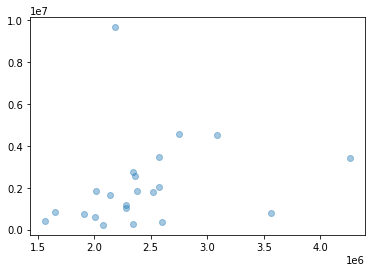

In [ ]:
plt.scatter(pred_y, test_y, alpha = 0.4)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true = test_y, y_pred = pred_y)
print('R2 = ', r2)

R2 =  0.030859576052703286


Selecting Variable by ML

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(x_pp)
test_features = scaler.transform(test_p)

In [ ]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

from tensorflow.keras.layers import Dropout

In [ ]:
import random
r2 = 0
batch_list = []
learning_list = []
drop_list = []
r2_list = []
model_size = []

T=30
for t in range(T):
  i=0
  batch = random.randint(0,10)
  batch_list.append(batch)
  learning_rate = 10**random.randint(-5,-1)*random.randint(1,9)
  learning_list.append(learning_rate)
  epochs = 300
  drop = 0.01*random.randint(1,50)
  drop_list.append(drop)

  tf.random.set_seed(i)

  model = models.Sequential() # ANN 형성
  fin = random.randint(2,10)
  model_size.append(fin)

  for t in range(1,int(fin/2)):
    model.add(layers.Dense(8*2**t, activation = 'relu', input_shape=(train_features.shape[1],)))
    model.add(Dropout(drop))

  for t in range(int(fin/2),1,-1):
    model.add(layers.Dense(8*2**t, activation = 'relu', input_shape=(train_features.shape[1],)))
    model.add(Dropout(drop))

  model.add(layers.Dense(1))
  i = i+1
   
  print(f"{i}th : batch = {batch}, learing rate = {learning_rate}, drop = {drop}")
  adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=adam, loss='mse', metrics=['mape'])
  es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
  lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=learning_rate) # learning rate 관련

  reg_history = model.fit(train_features, train_y, epochs=epochs, batch_size=batch, validation_split=0.2,
                        callbacks=[es,lr])
  
  y_pred = model.predict(test_features)
  print(f"r2 score : {r2}")
  r2 = r2_score(test_y, y_pred)
  r2_list.append(r2)

newList = [x for x in r2_list if x>0]
newList



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5/5 [==============================] - 1s 49ms/step - loss: 8573024206848.0000 - mape: 100.0000 - val_loss: 7820502630400.0000 - val_mape: 100.0000 - lr: 0.0100
Epoch 2/300
5/5 [==============================] - 0s 12ms/step - loss: 8573020536832.0000 - mape: 99.9998 - val_loss: 7820496338944.0000 - val_mape: 99.9999 - lr: 0.0100
Epoch 3/300
5/5 [==============================] - 0s 14ms/step - loss: 8573013721088.0000 - mape: 99.9998 - val_loss: 7820490047488.0000 - val_mape: 99.9998 - lr: 0.0100
Epoch 4/300
5/5 [==============================] - 0s 11ms/step - loss: 8573003759616.0000 - mape: 99.9996 - val_loss: 7820479037440.0000 - val_mape: 99.9997 - lr: 0.0100
Epoch 5/300
5/5 [==============================] - 0s 12ms/step - loss: 8572988030976.0000 - mape: 99.9992 - val_loss: 7820462784512.0000 - val_mape: 99.9996 - lr: 0.0100
Epoch 6/300
5/5 [==============================] - 0s 20ms/step - loss: 8572977020928.0000 - mape: 99.9987 - val_loss: 

[0.00782414684939925,
 0.04901920221348666,
 0.0011109733850495074,
 0.020741011199048143]

In [ ]:
print(max(r2_list))

0.04901920221348666


모델 추출

In [ ]:
ind = r2_list.index(max(r2_list))
print(ind)
batch = batch_list[ind]
learning_rate = learning_list[ind]
drop = drop_list[ind]
size = model_size[ind]
epochs = 300

print(batch, learning_rate, drop, size)

6
3 0.0004 0.46 6


In [ ]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape=(train_features.shape[1],)))
model.add(Dropout(drop))
model.add(layers.Dense(32, activation = 'relu', input_shape=(train_features.shape[1],)))
model.add(Dropout(drop))
model.add(layers.Dense(64, activation = 'relu', input_shape=(train_features.shape[1],)))
model.add(Dropout(drop))
model.add(layers.Dense(128, activation = 'relu', input_shape=(train_features.shape[1],)))
model.add(Dropout(drop))
model.add(layers.Dense(128, activation = 'relu', input_shape=(train_features.shape[1],)))
model.add(Dropout(drop))
model.add(layers.Dense(64, activation = 'relu', input_shape=(train_features.shape[1],)))
model.add(Dropout(drop))
model.add(layers.Dense(32, activation = 'relu', input_shape=(train_features.shape[1],)))
model.add(Dropout(drop))
model.add(layers.Dense(16, activation = 'relu', input_shape=(train_features.shape[1],)))
model.add(Dropout(drop))

model.add(layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 16)                112       
                                                                 
 dropout_166 (Dropout)       (None, 16)                0         
                                                                 
 dense_211 (Dense)           (None, 32)                544       
                                                                 
 dropout_167 (Dropout)       (None, 32)                0         
                                                                 
 dense_212 (Dense)           (None, 64)                2112      
                                                                 
 dropout_168 (Dropout)       (None, 64)                0         
                                                                 
 dense_213 (Dense)           (None, 128)             

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=learning_rate) # learning rate 관련

reg_history = model.fit(train_features, train_y, epochs=epochs, batch_size=batch, validation_split=0.2,
                        callbacks=[es,lr])
  
y_pred = model.predict(test_features)

Epoch 1/300
14/14 [==============================] - 2s 49ms/step - loss: 8573024731136.0000 - mape: 100.0000 - val_loss: 7820506300416.0000 - val_mape: 100.0000 - lr: 4.0000e-04
Epoch 2/300
14/14 [==============================] - 0s 5ms/step - loss: 8573025779712.0000 - mape: 100.0000 - val_loss: 7820505776128.0000 - val_mape: 100.0000 - lr: 4.0000e-04
Epoch 3/300
14/14 [==============================] - 0s 7ms/step - loss: 8573026304000.0000 - mape: 99.9999 - val_loss: 7820504727552.0000 - val_mape: 100.0000 - lr: 4.0000e-04
Epoch 4/300
14/14 [==============================] - 0s 5ms/step - loss: 8573023158272.0000 - mape: 100.0000 - val_loss: 7820503154688.0000 - val_mape: 100.0000 - lr: 4.0000e-04
Epoch 5/300
14/14 [==============================] - 0s 6ms/step - loss: 8573022109696.0000 - mape: 99.9999 - val_loss: 7820503154688.0000 - val_mape: 100.0000 - lr: 4.0000e-04
Epoch 6/300
14/14 [==============================] - 0s 5ms/step - loss: 8573020012544.0000 - mape: 99.9999 - v

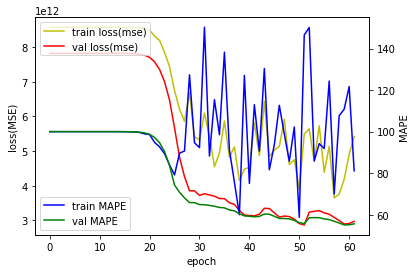

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

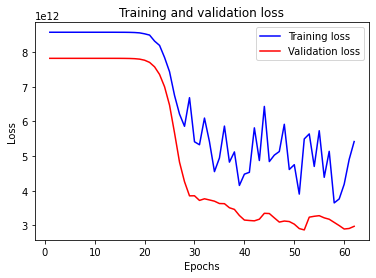

In [ ]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

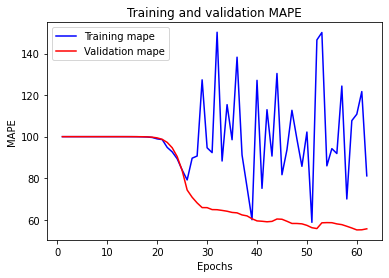

In [ ]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [ ]:
# 예측
y_pred = model.predict(test_features)

In [ ]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_y, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_y,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_y,y_pred))

test R squared: -0.074
test MSE: 4686725821607.703
tset MAPE: 1.244


주요 변수 확인

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer

In [ ]:
# MAPE
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [ ]:
result = permutation_importance(model, train_features, train_y, scoring = make_scorer(mean_absolute_percentage_error,greater_is_better=False),
                            n_repeats=30,
                            random_state=0)
# Feature label
Feature = x_pp

# Feature 중요도를 오름차순으로 정렬한 뒤, 해당 Feature 의 index 를 저장
sorted_result = result.importances_mean.argsort()

# 결과를 DataFrame
importances = pd.DataFrame(result.importances_mean[sorted_result], index=Feature.columns[sorted_result]).sort_values(0, ascending=False)   
importances

0
PC5  4.844180
PC3  0.666645
PC4  0.326032
PC6 -1.927670
PC2 -5.499839
PC1 -7.474488